In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import LogLocator

In [2]:
binary_df = pd.read_csv("multiplication_times_binary.csv")
ternary_df = pd.read_csv("multiplication_times_ternary.csv")

In [5]:
binary_df

,Vector Length,Naive Time (s),RSR Time (s),Speedup (RSR/Naive)
0,2048,0.032812,0.023894,1.373227
1,4096,0.181756,0.076645,2.371404
2,8192,0.917374,0.267688,3.427023
3,16384,4.861608,0.952317,5.105030
4,32768,22.366774,3.379006,6.619336


In [29]:
def plot(df, filename: str):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

    vector_lengths = df['Vector Length']  # Length of each vector
    speedup = df['Speedup (RSR/Naive)']
    naive_times = df['Naive Time (s)']
    rsr_times = df['RSR Time (s)']

    # Create the plot with improved aesthetics
    # plt.figure(figsize=(12, 6))
    plt.figure(figsize=(10, 6))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(vector_lengths, naive_times, label='Naive Multiplier', marker='o', color='steelblue')
    plt.plot(vector_lengths, rsr_times, label='RSR Multiplier', marker='o', color='darkorange')

    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(vector_lengths)):
        plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_times[i]], 
                color='gray', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(vector_lengths):
        plt.text(length, (naive_times[i] + rsr_times[i]) / 2, f"{speedup[i]:.1f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.xlabel('$n$ (log scale, base 2)')
    plt.ylabel('Time (seconds)')
    # plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
    plt.legend(fontsize=14)

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))
    plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


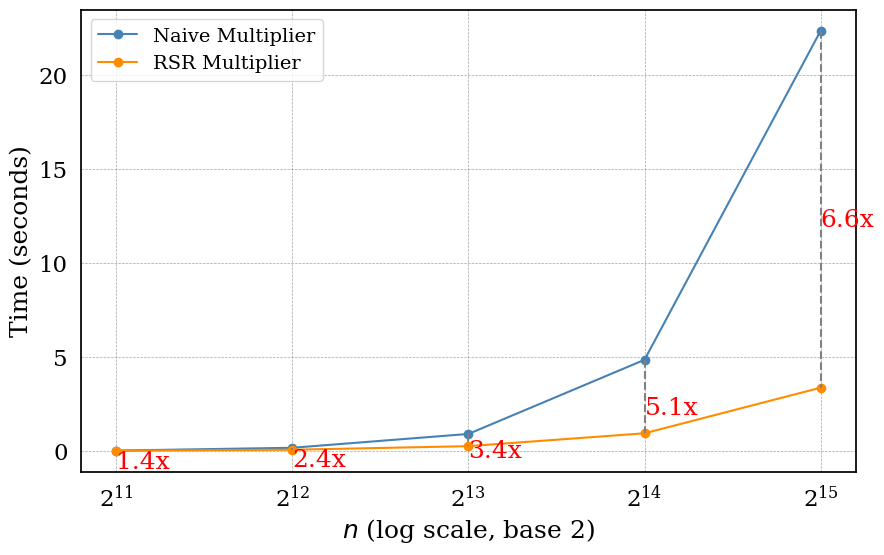

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


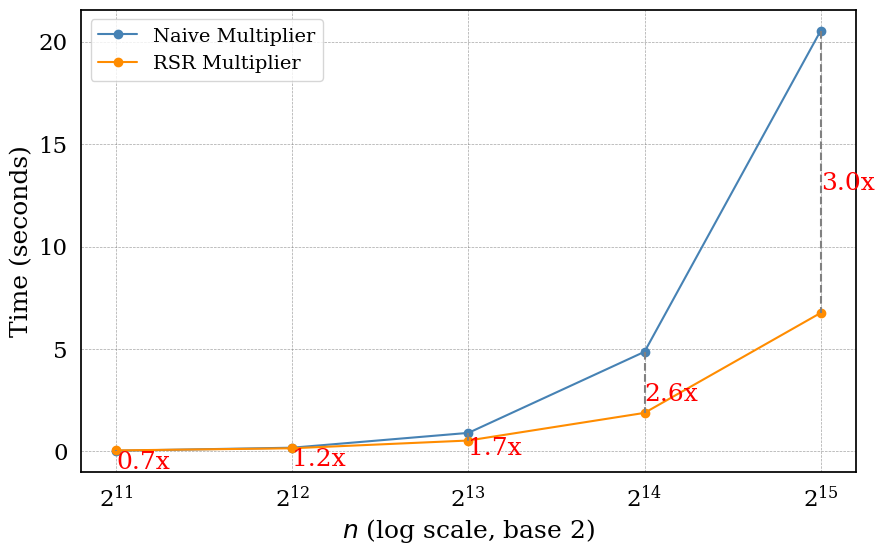

In [30]:
plot(binary_df, "new_binary")
plot(ternary_df, "new_ternary")